### Импорт необходимых библиотек

In [18]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

### Загрузка данных

In [19]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Просмотр данных

In [21]:
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Предобработка данных

In [23]:
X = train_df.drop('label', axis=1)
y = train_df['label']

In [24]:
X = X / 255.0
test_df= test_df / 255.0

In [25]:
X = X.values.reshape(-1, 28, 28, 1)
test_df = test_df.values.reshape(-1, 28, 28, 1)

In [26]:
y = to_categorical(y, 10)

### Разделение данных на обучающую и тестовую выборки

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Визуализация данных

In [28]:
def plot_sample_digits(X, y, num_samples=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {np.argmax(y[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

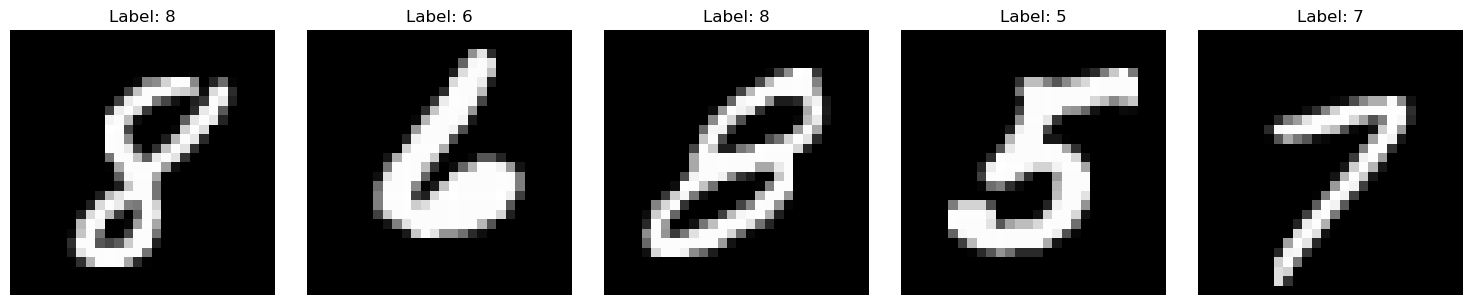

In [29]:
plot_sample_digits(X_train, y_train)

### Определение модели

In [30]:
model = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

### Компиляция модели

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Настройка обратных вызовов

In [32]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Обучение модели

In [33]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=50, 
    batch_size=64, 
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 82s 169ms/step - accuracy: 0.8682 - loss: 0.4363 - val_accuracy: 0.8492 - val_loss: 0.4392 - learning_rate: 0.0010
Epoch 2/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 74s 162ms/step - accuracy: 0.9759 - loss: 0.0763 - val_accuracy: 0.9857 - val_loss: 0.0450 - learning_rate: 0.0010
Epoch 3/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 81s 176ms/step - accuracy: 0.9817 - loss: 0.0565 - val_accuracy: 0.9752 - val_loss: 0.0785 - learning_rate: 0.0010
Epoch 4/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 79s 171ms/step - accuracy: 0.9845 - loss: 0.0498 - val_accuracy: 0.9870 - val_loss: 0.0425 - learning_rate: 0.0010
Epoch 5/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 81s 177ms/step - accuracy: 0.9883 - loss: 0.0382 - val_accuracy: 0.9880 - val_loss: 0.0425 - learning_rate: 0.0010
Epoch 6/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 80s 174ms/step - accuracy: 0.9906 - loss: 0.0320 - val_accuracy: 0.9905 - val_loss: 0.0333 - learning_rate: 0.0010
Epoch 7/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 80s 175ms/step - accuracy: 0.9

### Визуализация данных

In [34]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

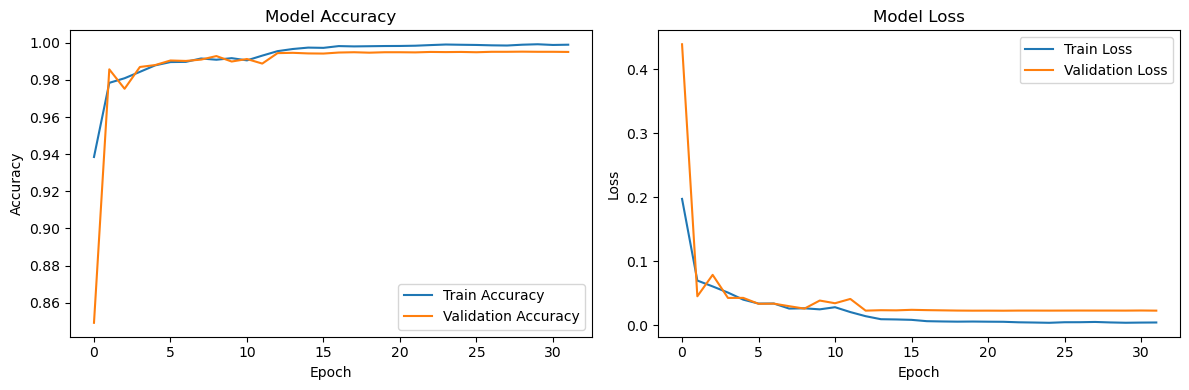

In [35]:
plot_training_history(history)

### Предсказание на тестовом наборе

In [36]:
predictions = model.predict(test_df)

875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step


In [37]:
predictions = np.argmax(predictions, axis=1)

### Сохранение результатов 

In [38]:
submission = pd.DataFrame({'ImageId': np.arange(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('submission.csv', index=False)

## Kaggle Score:
**Top 5% scoring: 0.99553**